In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = CountVectorizer(input='file', stop_words='english', ngram_range = (1,1), token_pattern="[^\W\d_]+")
corpus_1 = open('data/data_mining.txt')
corpus_2 = open('data/structures_of_comp_sci.txt')
corpus_3 = open('data/theory_of_comp.txt')
corpus_4 = open('data/Bussiness_comm.txt')
corpus_5 = open('data/european_hist.txt')

# so when I do them togther i seem to get the same size vector 
vectors = vectorizer.fit_transform([corpus_1, corpus_2, corpus_3, corpus_4, corpus_5])
print(vectors[0].shape)
print(vectors[1].shape)
print(vectors[2].shape)
# print(vectors)
# print(vectorizer.vocabulary_)
similarity = cosine_similarity(vectors)
print(similarity)

(1, 1653)
(1, 1653)
(1, 1653)
[[1.         0.45684928 0.35402924 0.24446121 0.19363726]
 [0.45684928 1.         0.54191633 0.31950171 0.29878529]
 [0.35402924 0.54191633 1.         0.28246713 0.26236331]
 [0.24446121 0.31950171 0.28246713 1.         0.26666619]
 [0.19363726 0.29878529 0.26236331 0.26666619 1.        ]]


([<matplotlib.axis.XTick at 0x19d55e7eec0>,
 [Text(0.5, 0, 'Data Mining'),
  Text(1.5, 0, 'Struct of comp sci'),
  Text(2.5, 0, 'theory of comp'),
  Text(3.5, 0, 'business comm'),
  Text(4.5, 0, 'european hist')])

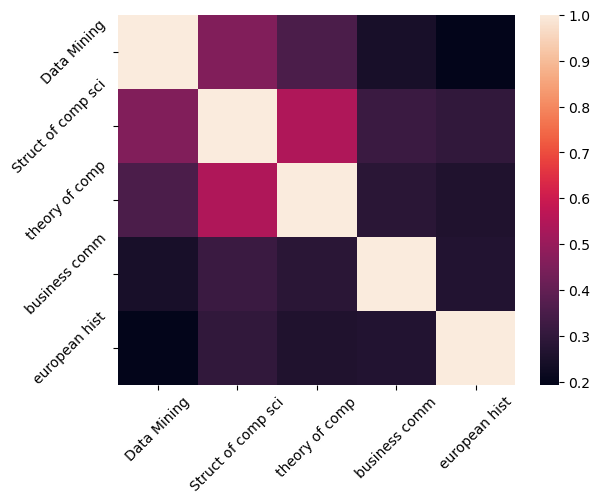

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.heatmap(similarity)

plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=['Data Mining', 'Struct of comp sci', 'theory of comp', 'business comm', 'european hist'], rotation=45)

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=['Data Mining', 'Struct of comp sci', 'theory of comp', 'business comm', 'european hist'], rotation=45)

